# Project 5 - Aakash Tandel

From Kaggle:

The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2015 (with annual updates planned for the future). The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 150,000 cases. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.

Geography: Worldwide

Time period: 1970-2015, except 1993 (2016 in progress, publication expected June 2017)

Unit of analysis: Attack

Variables: >100 variables on location, tactics, perpetrators, targets, and outcomes

Sources: Unclassified media articles (Note: Please interpret changes over time with caution. Global patterns are driven by diverse trends in particular regions, and data collection is influenced by fluctuations in access to media coverage over both time and place.)

Definition of terrorism:

"The threatened or actual use of illegal force and violence by a non-state actor to attain a political, economic, religious, or social goal through fear, coercion, or intimidation."

## Exploratory Data Analysis

Objective: Gain an understanding of the distribution and frequency of terror attacks (attacktype1) across the world. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%pylab inline
sns.set_style("whitegrid")

Populating the interactive namespace from numpy and matplotlib


In [2]:
raw_data = pd.read_csv('/Users/aakashtandel/Documents/globalterrorismdb_0617dist.csv')

/Users/aakashtandel/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (4,6,31,33,53,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
raw_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
raw_data.columns
for each in raw_data.columns:
    print each

eventid
iyear
imonth
iday
approxdate
extended
resolution
country
country_txt
region
region_txt
provstate
city
latitude
longitude
specificity
vicinity
location
summary
crit1
crit2
crit3
doubtterr
alternative
alternative_txt
multiple
success
suicide
attacktype1
attacktype1_txt
attacktype2
attacktype2_txt
attacktype3
attacktype3_txt
targtype1
targtype1_txt
targsubtype1
targsubtype1_txt
corp1
target1
natlty1
natlty1_txt
targtype2
targtype2_txt
targsubtype2
targsubtype2_txt
corp2
target2
natlty2
natlty2_txt
targtype3
targtype3_txt
targsubtype3
targsubtype3_txt
corp3
target3
natlty3
natlty3_txt
gname
gsubname
gname2
gsubname2
gname3
gsubname3
motive
guncertain1
guncertain2
guncertain3
individual
nperps
nperpcap
claimed
claimmode
claimmode_txt
claim2
claimmode2
claimmode2_txt
claim3
claimmode3
claimmode3_txt
compclaim
weaptype1
weaptype1_txt
weapsubtype1
weapsubtype1_txt
weaptype2
weaptype2_txt
weapsubtype2
weapsubtype2_txt
weaptype3
weaptype3_txt
weapsubtype3
weapsubtype3_txt
weaptype4
weapt

There are a fair number of columns. This will make analysis both more difficult and easier. 

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170350 entries, 0 to 170349
Columns: 135 entries, eventid to related
dtypes: float64(53), int64(24), object(58)
memory usage: 175.5+ MB


In [6]:
raw_data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.703500e+05,170350.000000,170350.000000,170350.000000,170350.000000,170350.000000,170350.000000,165744.000000,165744.000000,170346.000000,...,1.279000e+03,4.960000e+02,7.070000e+02,487.000000,9911.000000,9322.000000,170350.000000,170350.000000,170350.000000,170350.000000
mean,2.001776e+11,2001.709997,6.474365,15.466845,0.043634,132.526669,7.091441,23.399774,26.350909,1.454428,...,3.224502e+06,4.519918e+05,3.849663e+05,272.462012,4.624458,-28.717335,-4.583387,-4.510555,0.091083,-3.975128
std,1.314444e+09,13.144146,3.392364,8.817929,0.204279,112.848161,2.949206,18.844885,58.570068,1.009005,...,3.090625e+07,6.070186e+06,2.435027e+06,3130.068208,2.041008,58.737198,4.542694,4.630440,0.583166,4.691492
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-176.176447,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.990053e+11,1990.000000,4.000000,8.000000,0.000000,75.000000,5.000000,11.263580,2.396199,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.007121e+11,2007.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.472680,43.130000,1.000000,...,1.420000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014023e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.744167,68.451297,1.000000,...,4.000000e+05,0.000000e+00,7.356800e+02,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017013e+11,2016.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,179.366667,5.000000,...,1.000000e+09,1.320000e+08,4.100000e+07,48000.000000,7.000000,1201.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
raw_data.shape

(170350, 135)

In [8]:
raw_data['attacktype1']

0         1
1         6
2         1
3         3
4         7
5         2
6         1
7         3
8         7
9         7
10        3
11        7
12        4
13        7
14        7
15        3
16        9
17        3
18        3
19        7
20        7
21        2
22        3
23        3
24        7
25        1
26        3
27        6
28        3
29        7
         ..
170320    2
170321    1
170322    2
170323    2
170324    3
170325    3
170326    1
170327    3
170328    2
170329    6
170330    3
170331    9
170332    3
170333    3
170334    3
170335    3
170336    3
170337    3
170338    2
170339    9
170340    9
170341    9
170342    9
170343    3
170344    3
170345    9
170346    3
170347    6
170348    1
170349    2
Name: attacktype1, Length: 170350, dtype: int64

In [9]:
def eda_helper(df):  # Thanks Roland!
    dict_list = []
    for col in df.columns:
        data = df[col]
        dict_ = {}
        # The null count for a column. Columns with no nulls are generally more interesting
        dict_.update({"null_count" : data.isnull().sum()})
        # Counting the unique values in a column
        # This is useful for seeing how interesting the column might be as a feature
        dict_.update({"unique_count" : len(data.unique())})
        # Finding the types of data in the column
        # This is useful for finding out potential problems with a column having strings and ints
        dict_.update({"data_type" : set([type(d).__name__ for d in data])})
        #dict_.update({"score" : match[1]})
        dict_list.append(dict_)
    eda_df = pd.DataFrame(dict_list)
    eda_df.index = df.columns
    #eda_df = eda_df.sort_values(['null_count','unique_count'], ascending=[True, False])
    return eda_df

In [10]:
eda_helper(raw_data)

,data_type,null_count,unique_count
eventid,{int64},0,170350
iyear,{int64},0,46
imonth,{int64},0,13
iday,{int64},0,32
approxdate,"{float, str}",162886,1834
extended,{int64},0,2
resolution,"{float, str}",168131,1860
country,{int64},0,205
country_txt,{str},0,205
region,{int64},0,12


In [11]:
#raw_data.to_csv('out_raw.csv', sep='\t')

There are a lot of columns. I am going to first pick the columns that I think are important. 

In [12]:
features = raw_data[['iyear', 'imonth', 'iday', 'extended', 'approxdate', 'crit1', 'crit2', 'crit3', 'multiple', 
                    'country_txt', 'region_txt', 'latitude', 'longitude', 'attacktype1', 'attacktype1_txt', 
                    'attacktype2_txt', 'attacktype2', 'attacktype3', 'region', 'weaptype1', 'country',
                    'attacktype3_txt', 'success', 'suicide', 'weaptype1_txt', 'weapsubtype1_txt', 
                    'weapsubtype2_txt', 'weapsubtype3_txt', 'weapsubtype4_txt', 'targtype1_txt', 
                    'corp1', 'natlty1_txt', 'gname', 'gsubname', 'gsubname2', 'gname2', 
                    'nperps', 'nperpcap', 'nkill', 'nkillter', 'nwound', 'property', 
                    'propvalue','nhostkidus', 'ndays', 'ransomamt',
                    'longitude', 'latitude']]


In [13]:
features.head()

,iyear,imonth,iday,extended,approxdate,crit1,crit2,crit3,multiple,country_txt,...,nkill,nkillter,nwound,property,propvalue,nhostkidus,ndays,ransomamt,longitude,latitude
0,1970,7,2,0,NaN,1,1,1,0,Dominican Republic,...,1.0,NaN,0.0,0,NaN,NaN,NaN,NaN,-69.951164,18.456792
1,1970,0,0,0,NaN,1,1,1,0,Mexico,...,0.0,NaN,0.0,0,NaN,0.0,NaN,800000.0,-99.133207,19.432608
2,1970,1,0,0,NaN,1,1,1,0,Philippines,...,1.0,NaN,0.0,0,NaN,NaN,NaN,NaN,120.599741,15.478598
3,1970,1,0,0,NaN,1,1,1,0,Greece,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,23.728157,37.983773
4,1970,1,0,0,NaN,1,1,1,0,Japan,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,130.396361,33.580412


In [14]:
def combine64(years, months=1, days=1, weeks=None, hours=None, minutes=None,
              seconds=None, milliseconds=None, microseconds=None, nanoseconds=None):
    years = np.asarray(years) - 1970
    months = np.asarray(months) - 1
    days = np.asarray(days) - 1
    types = ('<M8[Y]', '<m8[M]', '<m8[D]', '<m8[W]', '<m8[h]',
             '<m8[m]', '<m8[s]', '<m8[ms]', '<m8[us]', '<m8[ns]')
    vals = (years, months, days, weeks, hours, minutes, seconds,
            milliseconds, microseconds, nanoseconds)
    return sum(np.asarray(v, dtype=t) for t, v in zip(types, vals)
               if v is not None)
# This function was pulled from Stack Overflow

In [15]:
features['datetime']=combine64(features['iyear'], features['imonth'], features['iday'])

/Users/aakashtandel/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
features.head()

,iyear,imonth,iday,extended,approxdate,crit1,crit2,crit3,multiple,country_txt,...,nkillter,nwound,property,propvalue,nhostkidus,ndays,ransomamt,longitude,latitude,datetime
0,1970,7,2,0,NaN,1,1,1,0,Dominican Republic,...,NaN,0.0,0,NaN,NaN,NaN,NaN,-69.951164,18.456792,1970-07-02
1,1970,0,0,0,NaN,1,1,1,0,Mexico,...,NaN,0.0,0,NaN,0.0,NaN,800000.0,-99.133207,19.432608,1969-11-30
2,1970,1,0,0,NaN,1,1,1,0,Philippines,...,NaN,0.0,0,NaN,NaN,NaN,NaN,120.599741,15.478598,1969-12-31
3,1970,1,0,0,NaN,1,1,1,0,Greece,...,NaN,NaN,1,NaN,NaN,NaN,NaN,23.728157,37.983773,1969-12-31
4,1970,1,0,0,NaN,1,1,1,0,Japan,...,NaN,NaN,1,NaN,NaN,NaN,NaN,130.396361,33.580412,1969-12-31


In [17]:
easy_df = features[['attacktype1', 'country_txt', 'country', 'weaptype1_txt', 'weaptype1', 'iyear', 'longitude','latitude']]
easy_df.head()

,attacktype1,country_txt,country,weaptype1_txt,weaptype1,iyear,longitude,longitude,latitude,latitude
0,1,Dominican Republic,58,Unknown,13,1970,-69.951164,-69.951164,18.456792,18.456792
1,6,Mexico,130,Unknown,13,1970,-99.133207,-99.133207,19.432608,19.432608
2,1,Philippines,160,Unknown,13,1970,120.599741,120.599741,15.478598,15.478598
3,3,Greece,78,Explosives/Bombs/Dynamite,6,1970,23.728157,23.728157,37.983773,37.983773
4,7,Japan,101,Incendiary,8,1970,130.396361,130.396361,33.580412,33.580412


In [19]:
easy_df = easy_df[easy_df.weaptype1==6]  # Boolean filtering. 

In [20]:
easy_df['country_txt'].value_counts

<bound method Series.value_counts of 3                     Greece
7              United States
10             United States
15        East Germany (GDR)
17             United States
18             United States
22             United States
23             United States
26               Philippines
28             United States
31             United States
35             United States
36             United States
37             United States
40             United States
46             United States
47             United States
48             United States
49             United States
55             United States
56             United States
57             United States
58             United States
61             United States
63             United States
64             United States
66             United States
67             United States
68             United States
70             United States
                 ...        
170280                 Syria
170285                 Yemen
170286

In [21]:
countries=easy_df.country_txt.unique()
dicti={}
for item in countries:
    dicti[item]=(easy_df[easy_df['country_txt']==item].groupby('iyear').attacktype1.count())
# This idea was thought up by Yoni Levine. 

In [22]:
df_tab = pd.DataFrame(dicti)
df_tab.head(5)

,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,...,Venezuela,Vietnam,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
iyear,,,,,,,,,,,,,,,,,,,,,
1970,NaN,NaN,NaN,NaN,4.0,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN
1971,NaN,NaN,NaN,NaN,2.0,NaN,1.0,NaN,NaN,NaN,...,1.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN
1972,NaN,NaN,NaN,NaN,8.0,NaN,2.0,1.0,NaN,NaN,...,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN
1973,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,9.0,NaN,NaN,1.0,1.0,1.0,NaN
1974,NaN,NaN,NaN,NaN,39.0,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,12.0,NaN,NaN,1.0,NaN,NaN,NaN


The dataframe above was just a simple way to quickly find the number of terror attacks by country for a given year. 

In [23]:
#df_tab.to_csv('out.csv', sep='\t', encoding='utf-8')

## Visualizations
One visualization (a timelapse map of terror attacks) can be found on my Tableau Public account. 


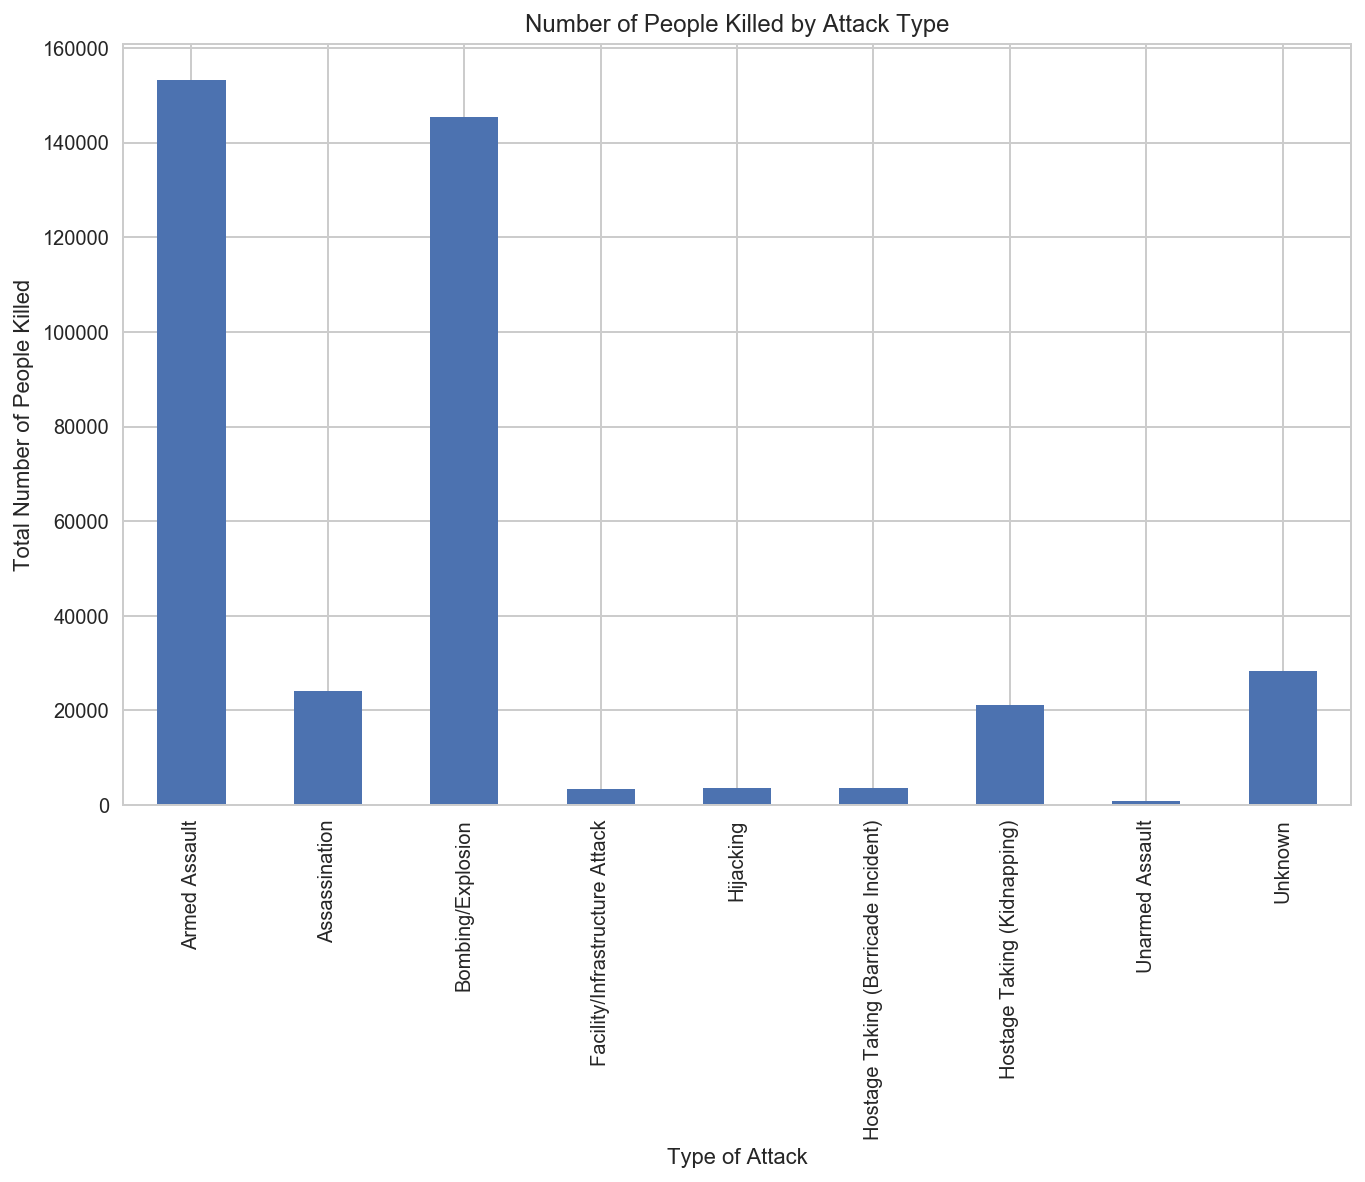

In [25]:
features.groupby('attacktype1_txt').nkill.sum().plot(kind='bar')
plt.title('Number of People Killed by Attack Type')
plt.xlabel('Type of Attack')
plt.ylabel('Total Number of People Killed')
pylab.rcParams['figure.figsize'] = (11, 7) 

Bombings and Armed Assults seem to be the most frequent types of attacks resulting in deaths from 1970-2016. 

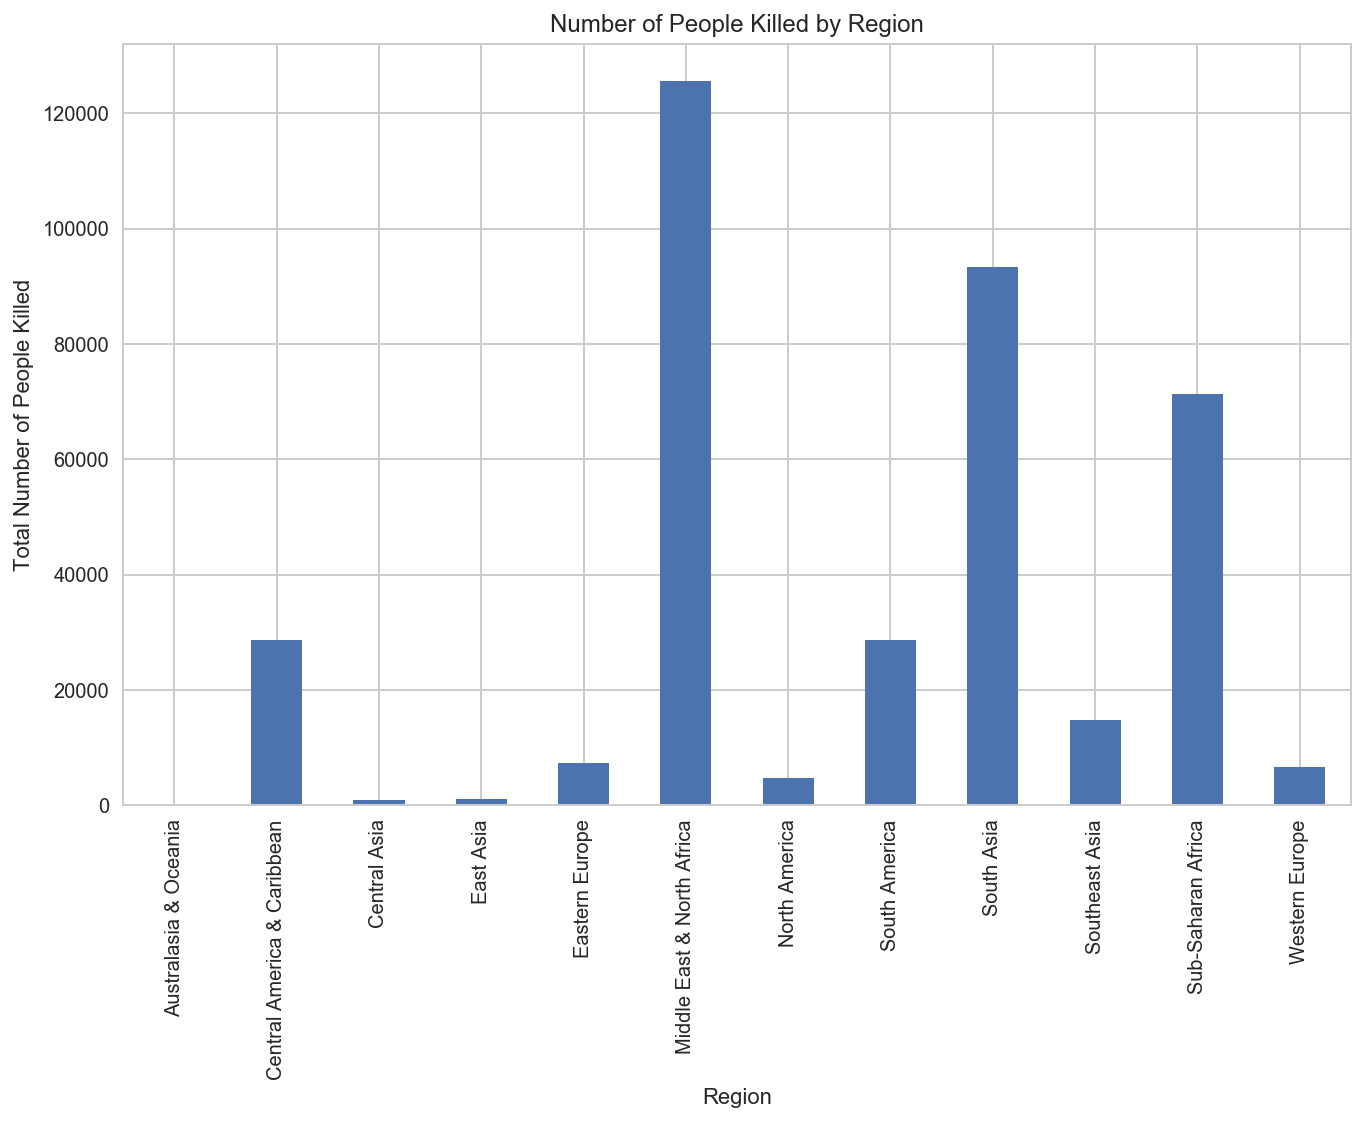

In [26]:
features.groupby('region_txt').nkill.sum().plot(kind='bar')
plt.title('Number of People Killed by Region')
plt.xlabel('Region')
plt.ylabel('Total Number of People Killed')
pylab.rcParams['figure.figsize'] = (11, 7) 

The Middle East and North Africa are the hardest hit in number of fatalities to terror from 1970-2016. 

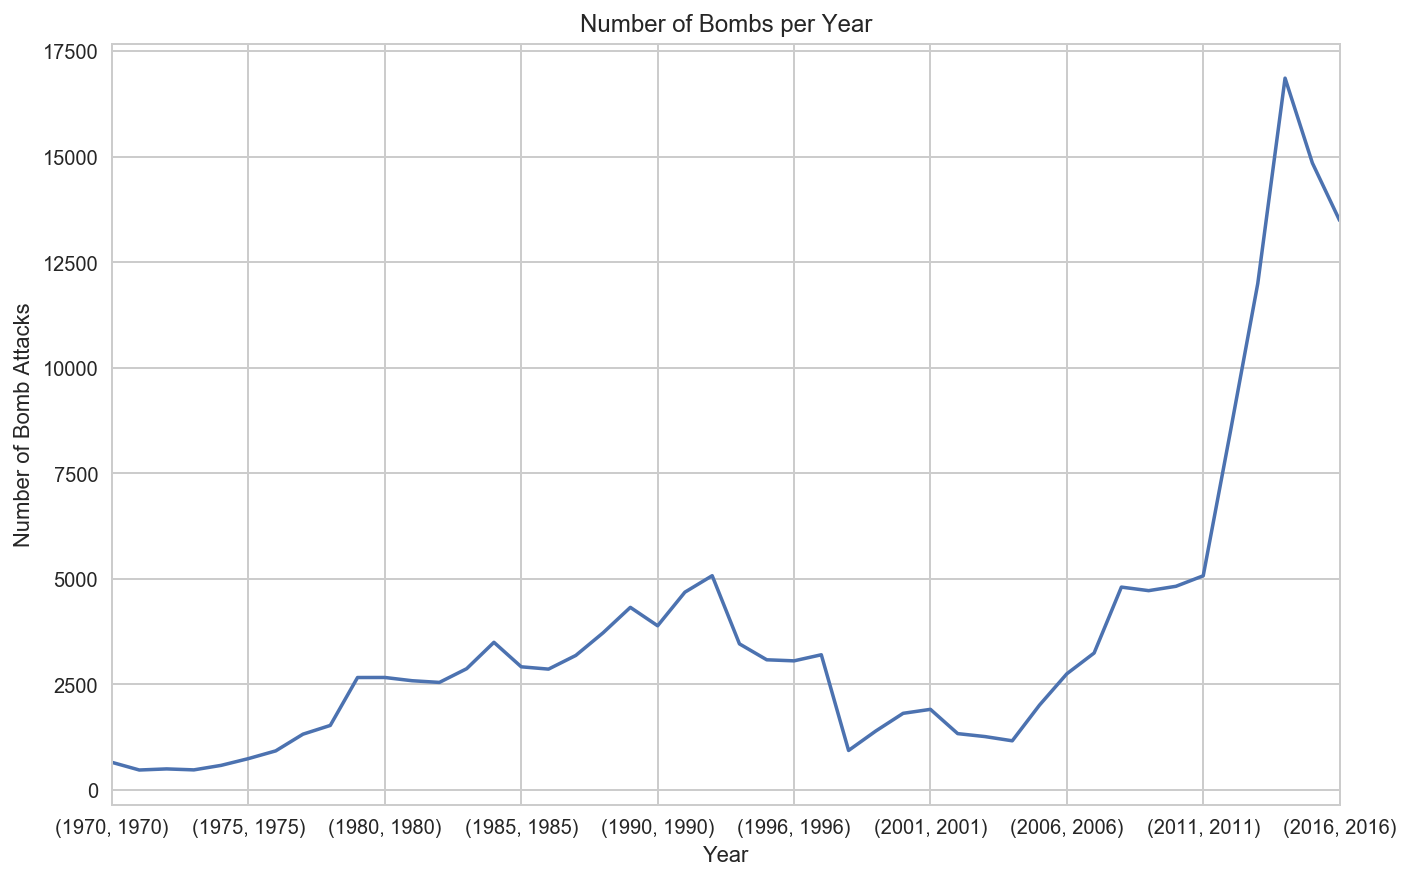

In [27]:
features.groupby('iyear').iyear.value_counts().plot(kind='line', )
plt.title('Number of Bombs per Year')
plt.xlabel('Year')
plt.ylabel('Number of Bomb Attacks')
pylab.rcParams['figure.figsize'] = (11, 7) 

The graph above shows a marked increase in bomb attacks since 2010. Due to this drastic increase in terror attacks, I am going to focus my analysis (for the section titled "Bayesian Inference" below) to the difference between the Phillipines and Indonesia post-2010. 

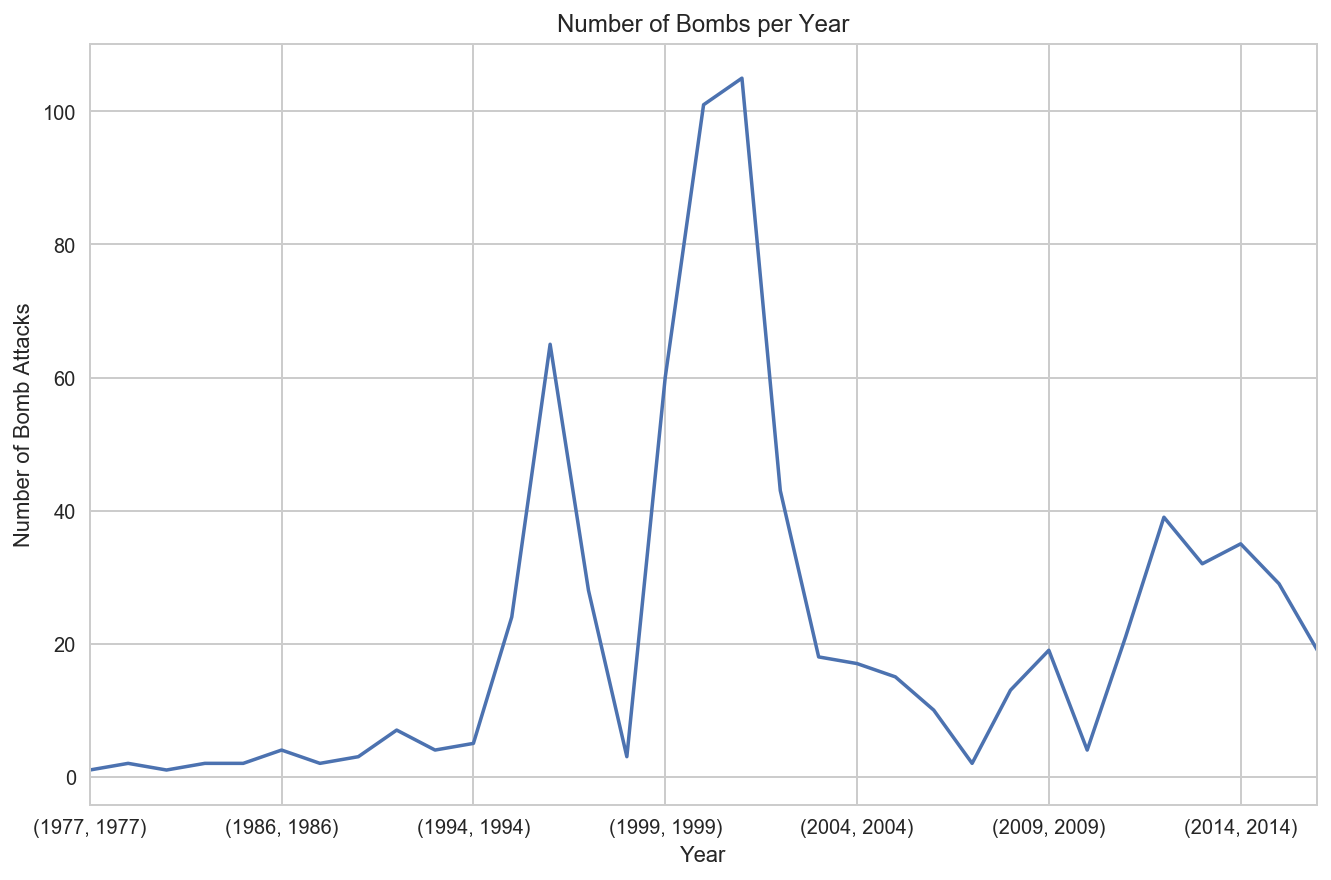

In [28]:
features_indo = features[features.country == 93]
features_indo.groupby('iyear').iyear.value_counts().plot(kind='line')
plt.title('Number of Bombs per Year')
plt.xlabel('Year')
plt.ylabel('Number of Bomb Attacks')
pylab.rcParams['figure.figsize'] = (11, 7) 

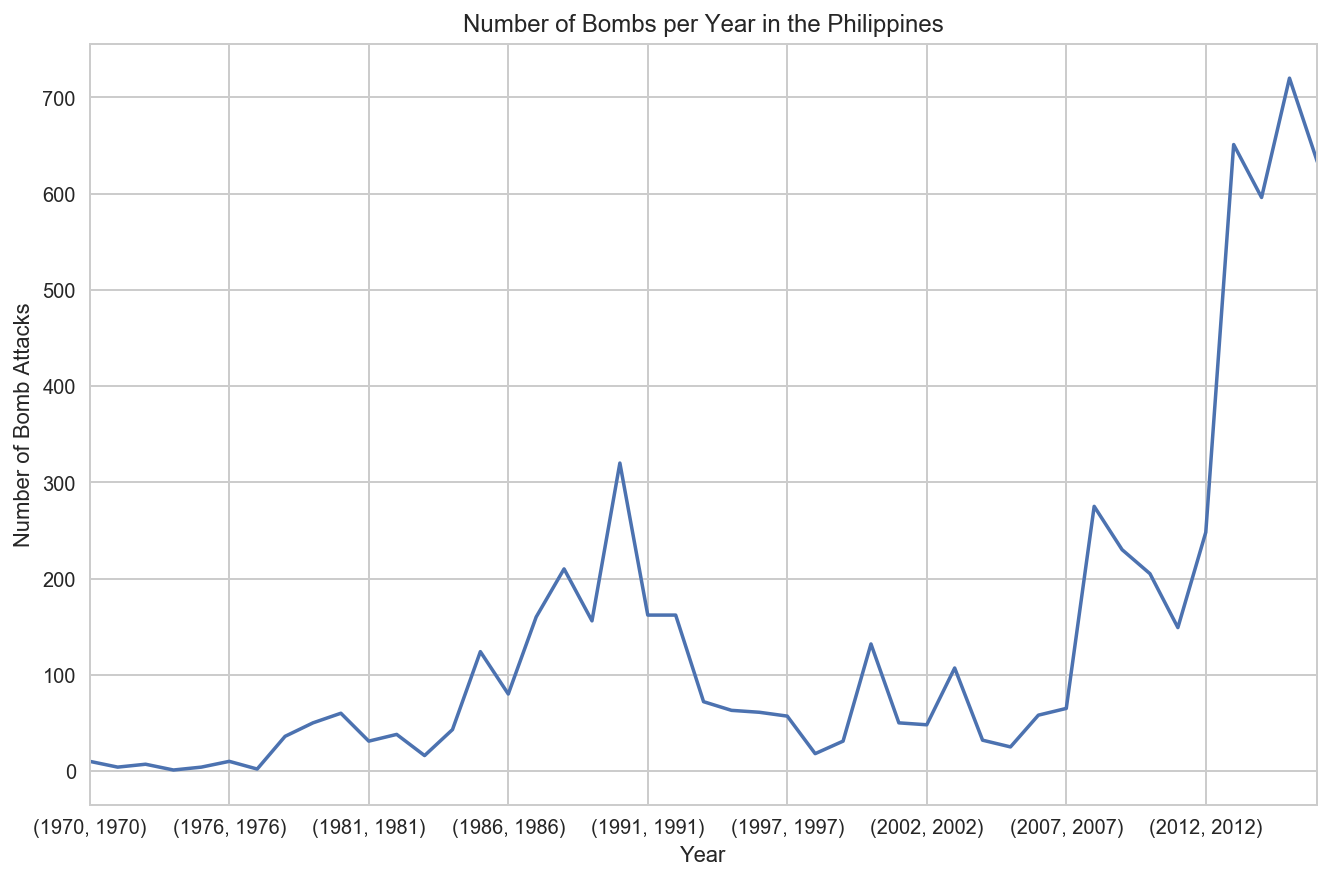

In [29]:
features_indo = features[features.country == 160]
features_indo.groupby('iyear').iyear.value_counts().plot(kind='line')
plt.title('Number of Bombs per Year in the Philippines')
plt.xlabel('Year')
plt.ylabel('Number of Bomb Attacks')
pylab.rcParams['figure.figsize'] = (11, 7) 

## Bayesian Inference 

In [30]:
import pymc3 as pm

Couldn't import dot_parser, loading of dot files will not be possible.


In [31]:
features['attacktype1'].value_counts()
# We want attacktype1 == 3. 

3    83073
2    40223
1    18402
6    10233
7     9581
9     6425
8      913
5      902
4      598
Name: attacktype1, dtype: int64

In [32]:
df_attacktype1 = features[(features['attacktype1'] == 3) & (features['country']==160)]

Now we had a dataframe that is of only attacktype1 (bombings and explosions) in the Philippines.

In [33]:
df_attacktype1_pre = df_attacktype1[(df_attacktype1.iyear < 2010)]
df_attacktype1_post = df_attacktype1[(df_attacktype1.iyear >= 2010)]

In [54]:
pre_phil = df_attacktype1_pre.iyear.groupby(df_attacktype1_pre['iyear']).value_counts()
post_phil = df_attacktype1_post.iyear.groupby(df_attacktype1_post['iyear']).value_counts()
print (pre_phil.head(10))
print (post_phil.head())

iyear  iyear
1970   1970      6
1971   1971      3
1972   1972      2
1975   1975      1
1976   1976      1
1978   1978     16
1979   1979      3
1980   1980     44
1981   1981      7
1982   1982     12
Name: iyear, dtype: int64
iyear  iyear
2010   2010      56
2011   2011      53
2012   2012     111
2013   2013     181
2014   2014     162
Name: iyear, dtype: int64


We first have to set up our priors. In this case we assume the average number of bombings in the Phillippines prior and post 2010 are the same at an average of 29 bombings per year.

In [52]:
mean_prior_mean = pre_phil.mean()
mean_prior_std = pre_phil.std()
print (mean_prior_mean)
print (mean_prior_std)

29.2777777778
32.9229499729


In [57]:
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016]
#indo_num = df_attacktype1_post[(df_attacktype1_post.country == 93)].iyear.value_counts().values
#print ('Number of bombings in Indonesia', zip(years, indo_num))
#phil_num = df_attacktype1_post[(df_attacktype1_post.country == 160)].iyear.value_counts().values
print ('Number of bombings in the Philippines', zip(years, post_phil))

('Number of bombings in the Philippines', [(2010, 56), (2011, 53), (2012, 111), (2013, 181), (2014, 162), (2015, 227), (2016, 200)])


In [60]:
# model specifications in PyMC3 are wrapped in a with-statement
# The priors both have the original mean of 29 bombings. 
with pm.Model() as model:
# Means 
    pre_mean = pm.Normal('Pre_mean', mean_prior_mean, sd=mean_prior_std)
    post_mean = pm.Normal('Post_mean', mean_prior_mean, sd=mean_prior_std)

In [61]:
std_prior_lower = 0.01
std_prior_upper = 100.0

with model:
# Standard Deviations     
    pre_phil_std = pm.Uniform('Pre_phil_std', lower=std_prior_lower, upper=std_prior_upper)
    post_phil_std = pm.Uniform('Post_phil_std', lower=std_prior_lower, upper=std_prior_upper)

In [62]:
with model:
# Likelihoods 
    pre = pm.Normal('Pre', mu=pre_mean, sd=pre_phil_std, observed=pre_phil)
    post = pm.Normal('Post', mu=post_mean, sd=post_phil_std, observed=post_phil)

In [63]:
with model:
# Differences 
    diff_of_means = pm.Deterministic('difference of means', pre_mean - post_mean)
    diff_of_stds = pm.Deterministic('difference of stds', pre_phil_std - post_phil_std)
    effect_size = pm.Deterministic('effect size',
                                   diff_of_means / np.sqrt((pre_phil_std**2 + post_phil_std**2) / 2))

In [64]:
import time

In [65]:
t0 = time.time()
with model:
    trace = pm.sample(6000, njobs=4)
t1 = time.time()

print t1 - t0

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 229.17:   6%|▌         | 11662/200000 [00:01<00:24, 7675.31it/s]
Convergence archived at 12000
Interrupted at 12,000 [6%]: Average Loss = 235.17
100%|█████████▉| 6489/6500 [00:28<00:00, 190.07it/s]/Users/aakashtandel/anaconda/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:456: UserWarning: Chain 0 contains 5 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|██████████| 6500/6500 [00:28<00:00, 231.09it/s]
/Users/aakashtandel/anaconda/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:456: UserWarning: Chain 1 contains 4 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
/Users/aakashtandel/anaconda/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:456: UserWarning: Chain 2 contains 3 diverging samples after tunin

52.0443360806


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12b5216d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x139579d10>]], dtype=object)

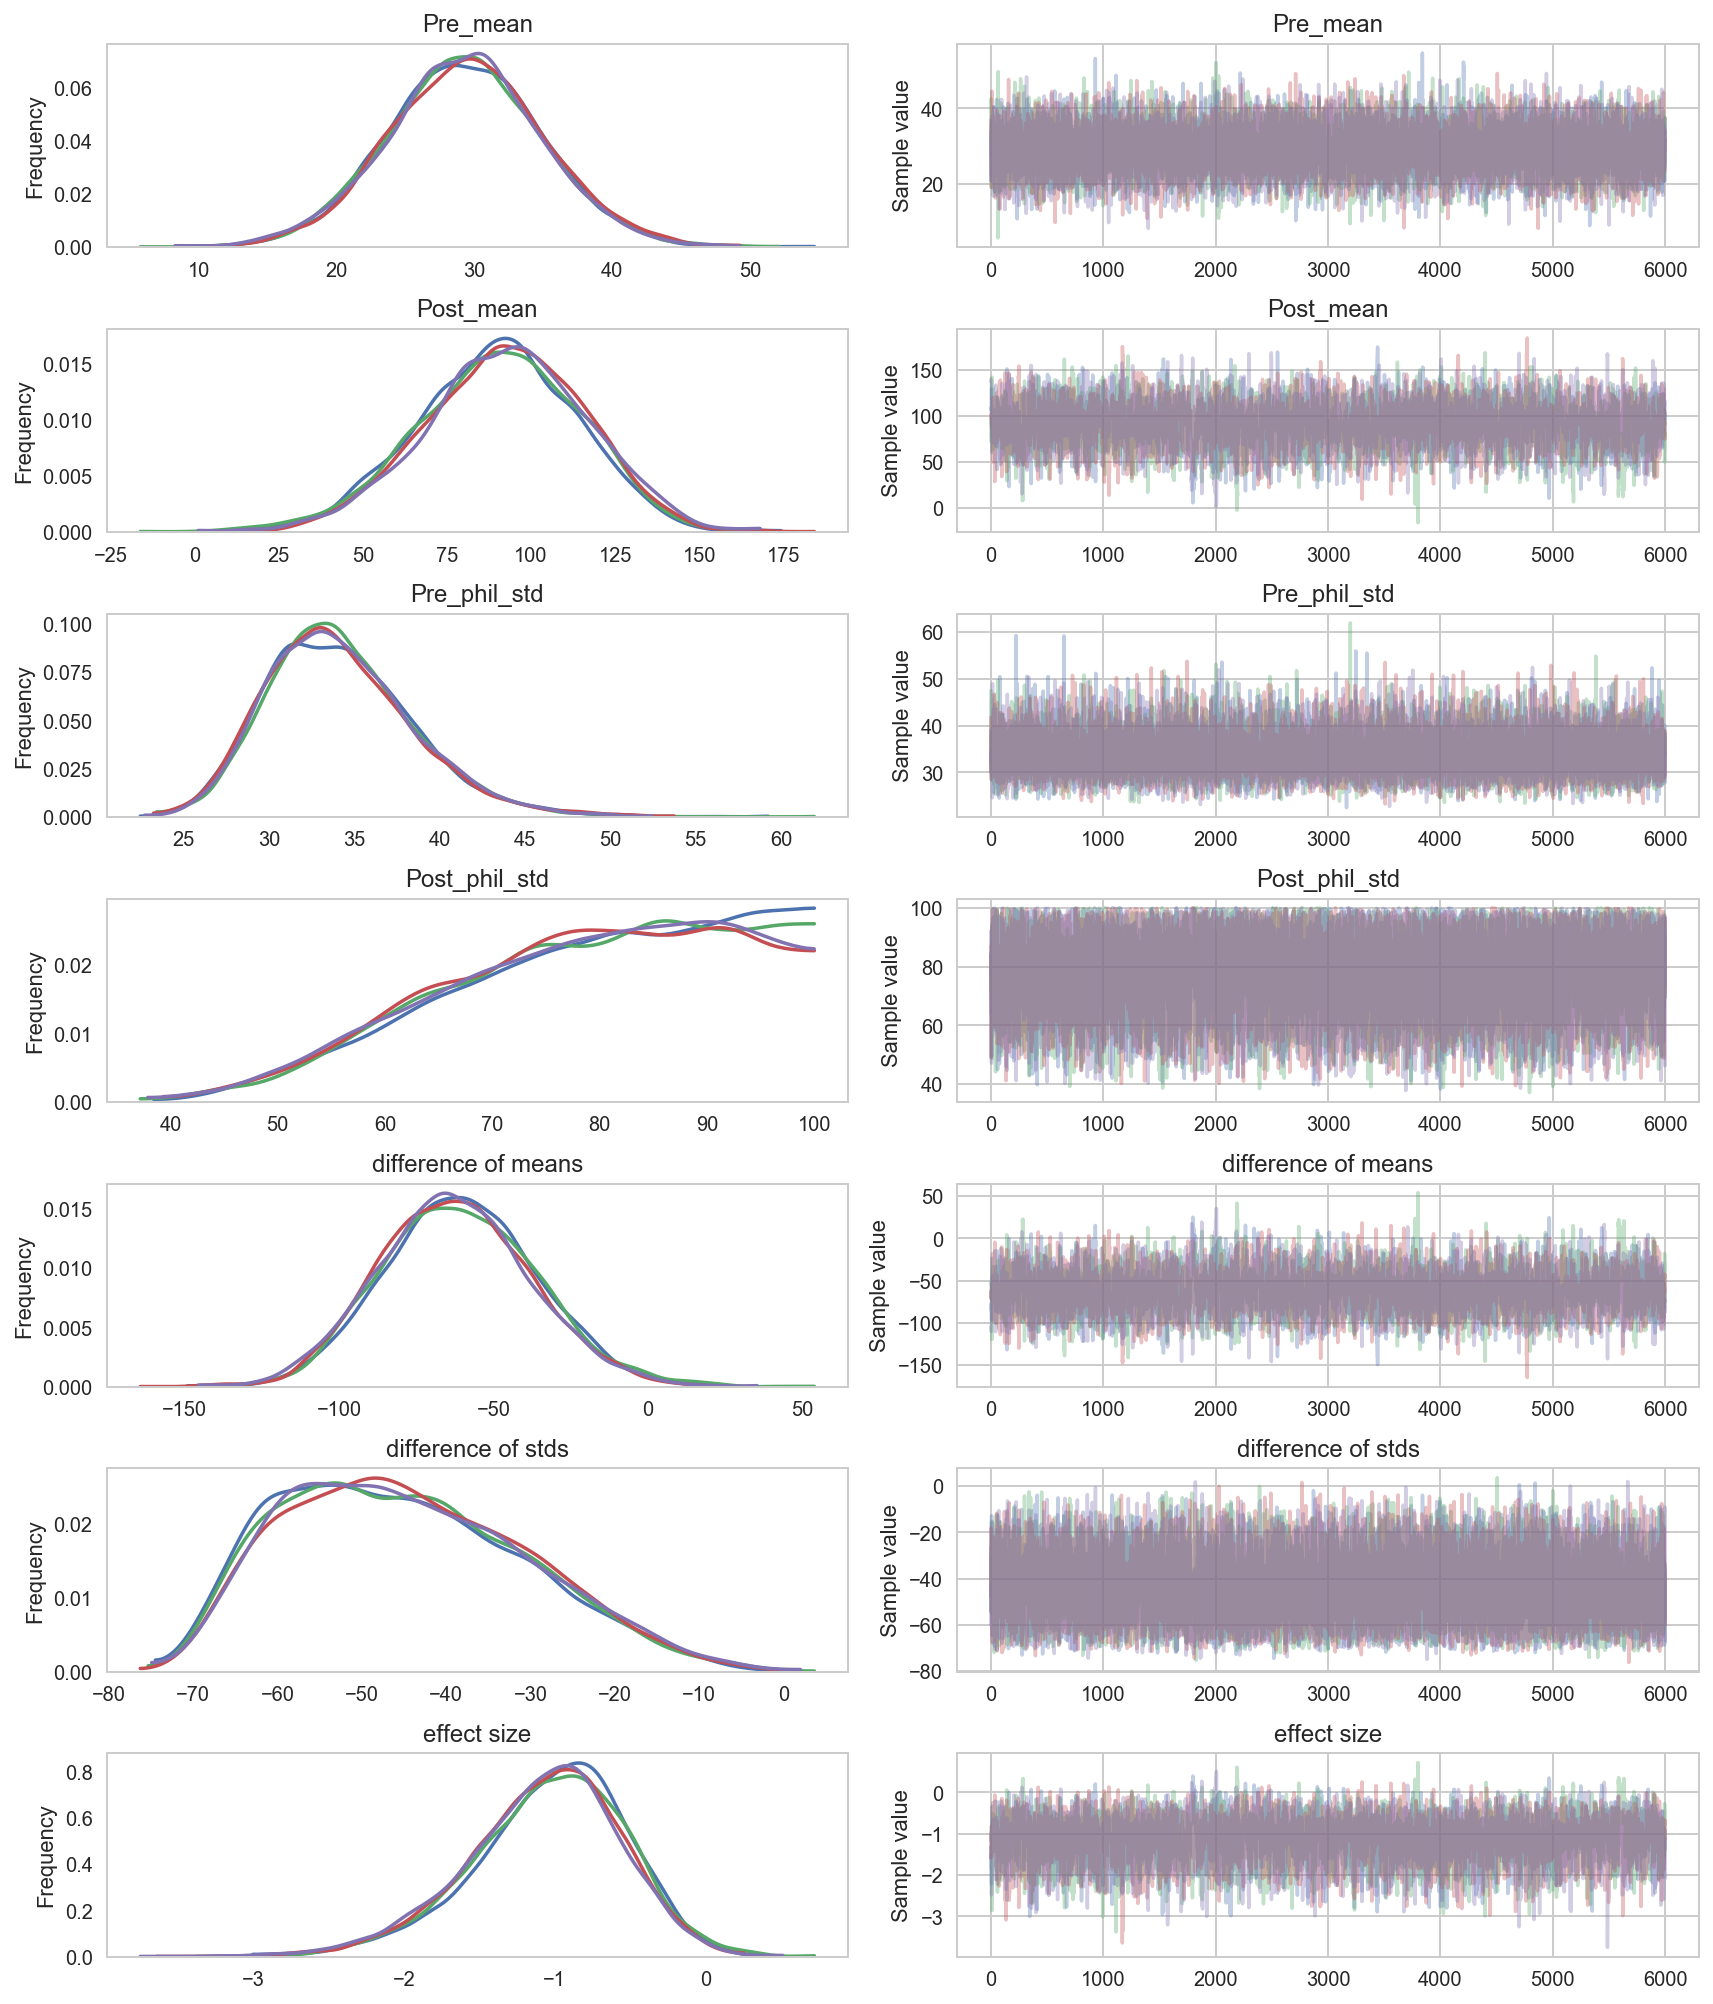

In [66]:
pm.traceplot(trace)

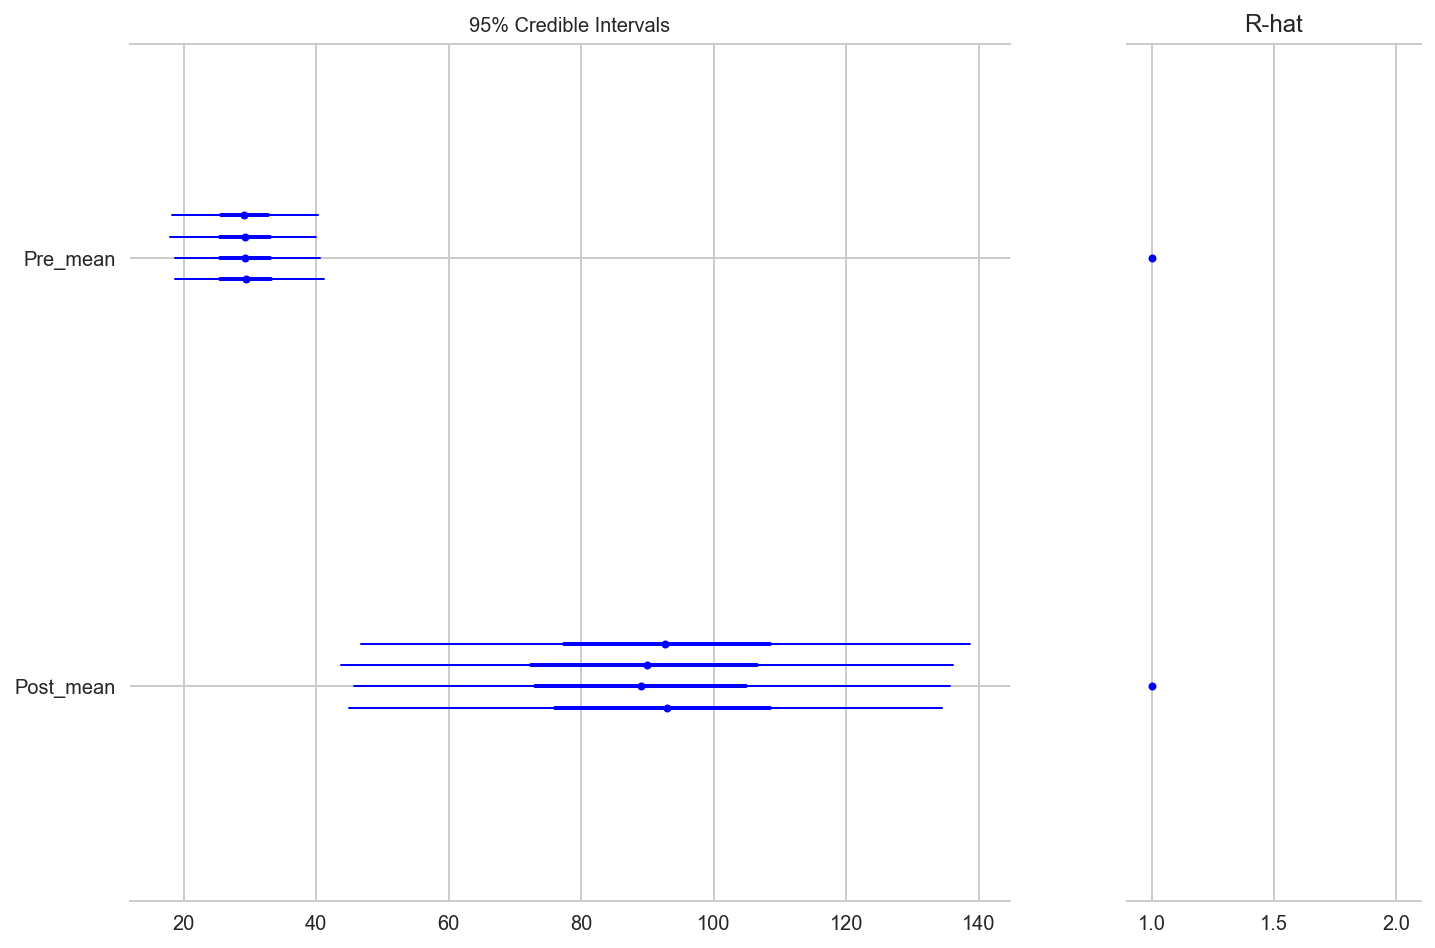

In [67]:
pm.forestplot(trace[2000:], varnames=[v.name for v in model.vars[:2]])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12b73a150>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x137bca150>], dtype=object)

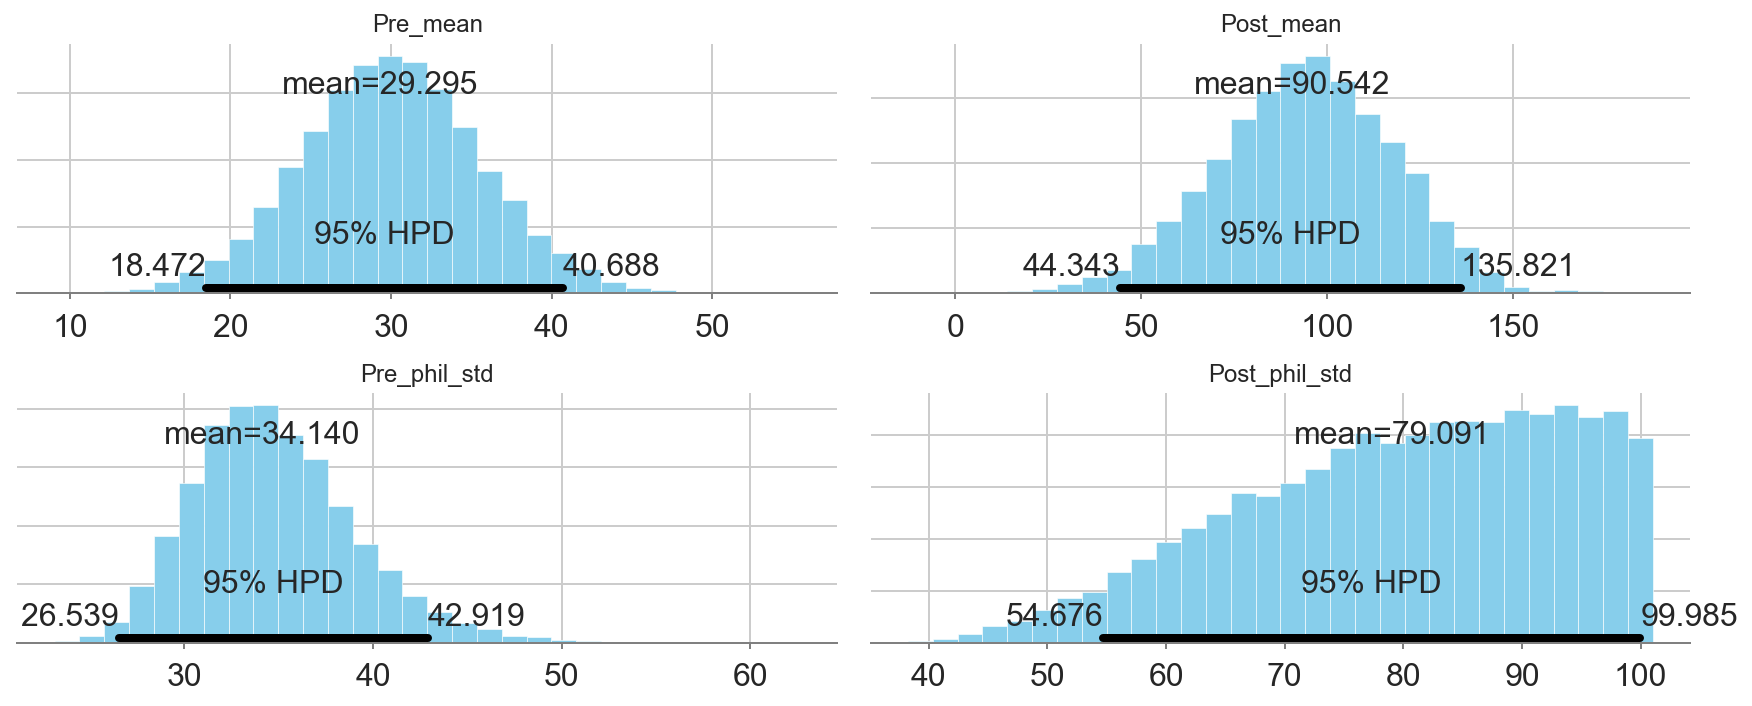

In [69]:
pm.plot_posterior(trace[2000:],
                  varnames=['Pre_mean', 'Post_mean', 'Pre_phil_std', 'Post_phil_std'],
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x137d19a50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x137bb10d0>], dtype=object)

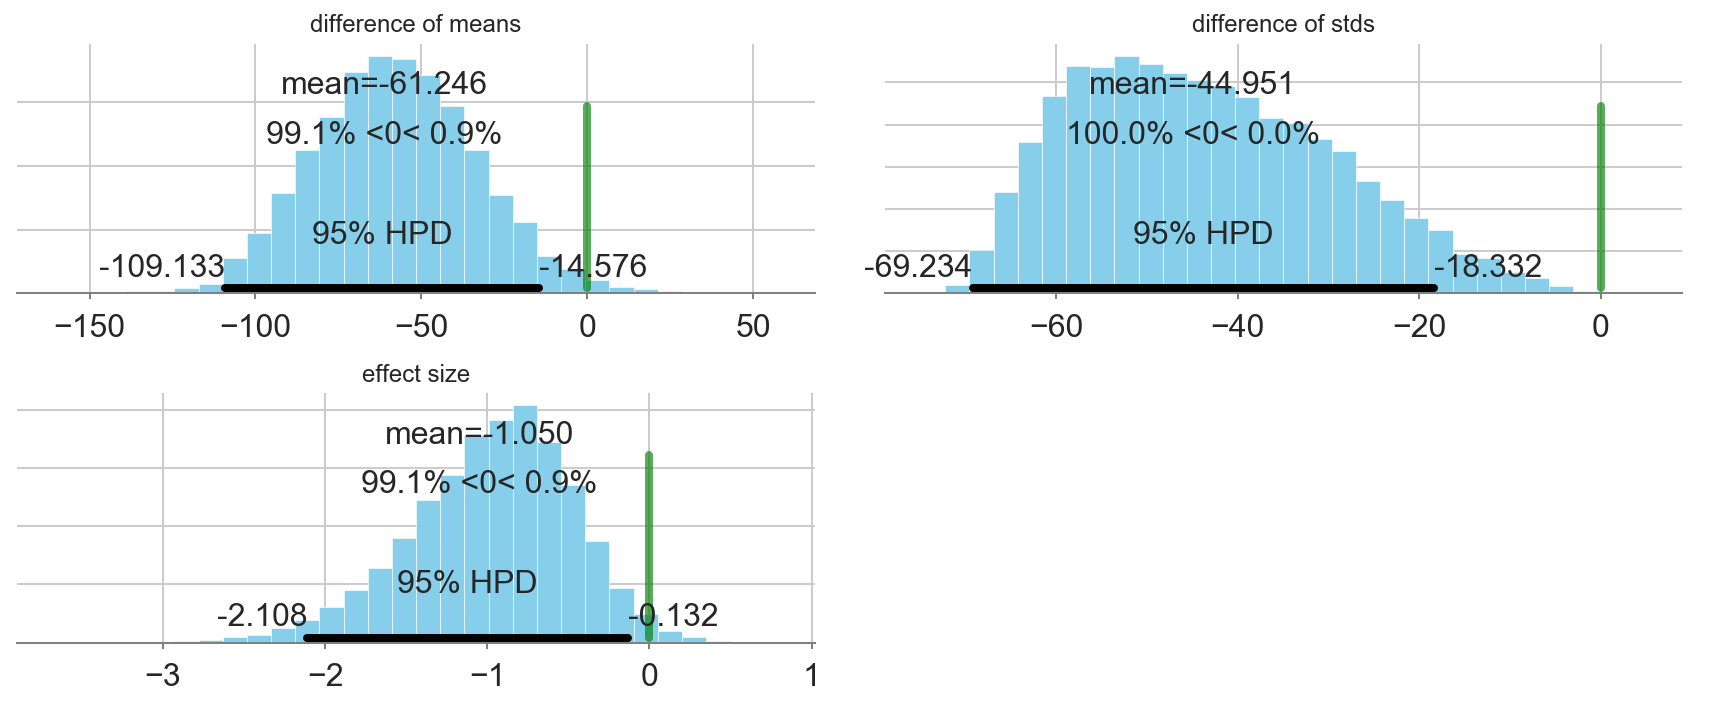

In [70]:
pm.plot_posterior(trace[2000:],
                  varnames=['difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

In [71]:
pm.summary(trace,
           varnames=['difference of means', 'difference of stds', 'effect size'])


difference of means:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -61.844          24.683           0.417            [-109.990, -14.459]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -108.052       -78.760        -62.490        -45.534        -11.633


difference of stds:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -44.811          14.119           0.155            [-68.336, -17.372]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -67.298        -56.070        -46.118        -34.892        -15.229


effect size:

  Mean             SD               MC Error       

#### Interpretation of Bayesian Analysis  
From the information above, we can see that there is a marked difference between the number of bombings pre-2010 and the number of bombings post-2010 in the Philippines. The credible intervals do not overlap and the difference in means is not encompassing zero. The Philippines has faced a higher level of terrorism since 2010 than compared to pre-2010 levels.  

## Finding Information on Bombings in 1993 

In [72]:
features_b = features[features['attacktype1']==3]
features_b.head()
# This is the same as df_attacktype1 but was constructed first. That is the reason for this redundancy. 

,iyear,imonth,iday,extended,approxdate,crit1,crit2,crit3,multiple,country_txt,...,nkillter,nwound,property,propvalue,nhostkidus,ndays,ransomamt,longitude,latitude,datetime
3,1970,1,0,0,NaN,1,1,1,0,Greece,...,NaN,NaN,1,NaN,NaN,NaN,NaN,23.728157,37.983773,1969-12-31
7,1970,1,2,0,NaN,1,1,1,0,United States,...,0.0,0.0,1,22500.0,NaN,NaN,NaN,-122.273024,37.805065,1970-01-02
10,1970,1,1,0,NaN,1,1,0,0,United States,...,NaN,0.0,0,0.0,NaN,NaN,NaN,-89.744299,43.468500,1970-01-01
15,1970,1,10,0,NaN,1,1,1,0,East Germany (GDR),...,NaN,NaN,0,NaN,NaN,NaN,NaN,13.400000,52.516667,1970-01-10
17,1970,1,12,0,NaN,1,1,1,0,United States,...,0.0,0.0,1,NaN,NaN,NaN,NaN,-73.947971,40.610069,1970-01-12


In [73]:
features_b.sort_index()

,iyear,imonth,iday,extended,approxdate,crit1,crit2,crit3,multiple,country_txt,...,nkillter,nwound,property,propvalue,nhostkidus,ndays,ransomamt,longitude,latitude,datetime
3,1970,1,0,0,NaN,1,1,1,0,Greece,...,NaN,NaN,1,NaN,NaN,NaN,NaN,23.728157,37.983773,1969-12-31
7,1970,1,2,0,NaN,1,1,1,0,United States,...,0.0,0.0,1,22500.0,NaN,NaN,NaN,-122.273024,37.805065,1970-01-02
10,1970,1,1,0,NaN,1,1,0,0,United States,...,NaN,0.0,0,0.0,NaN,NaN,NaN,-89.744299,43.468500,1970-01-01
15,1970,1,10,0,NaN,1,1,1,0,East Germany (GDR),...,NaN,NaN,0,NaN,NaN,NaN,NaN,13.400000,52.516667,1970-01-10
17,1970,1,12,0,NaN,1,1,1,0,United States,...,0.0,0.0,1,NaN,NaN,NaN,NaN,-73.947971,40.610069,1970-01-12
18,1970,1,12,0,NaN,1,1,1,0,United States,...,0.0,0.0,-9,NaN,NaN,NaN,NaN,-65.830948,18.379998,1970-01-12
22,1970,1,19,0,NaN,1,1,1,0,United States,...,0.0,0.0,1,2200.0,NaN,NaN,NaN,-122.317228,47.610594,1970-01-19
23,1970,1,19,0,NaN,1,1,1,0,United States,...,0.0,0.0,0,NaN,NaN,NaN,NaN,-122.303520,47.655335,1970-01-19
26,1970,1,21,0,NaN,1,1,1,0,Philippines,...,NaN,0.0,1,5000.0,NaN,NaN,NaN,121.044348,14.677301,1970-01-21
28,1970,1,22,0,NaN,1,1,1,0,United States,...,0.0,0.0,1,NaN,NaN,NaN,NaN,-96.413949,42.470310,1970-01-22


In [74]:
#features_b = features_b.drop(['index', 'iyear', 'imonth', 'iday'], axis=1)
features_b.head()

,iyear,imonth,iday,extended,approxdate,crit1,crit2,crit3,multiple,country_txt,...,nkillter,nwound,property,propvalue,nhostkidus,ndays,ransomamt,longitude,latitude,datetime
3,1970,1,0,0,NaN,1,1,1,0,Greece,...,NaN,NaN,1,NaN,NaN,NaN,NaN,23.728157,37.983773,1969-12-31
7,1970,1,2,0,NaN,1,1,1,0,United States,...,0.0,0.0,1,22500.0,NaN,NaN,NaN,-122.273024,37.805065,1970-01-02
10,1970,1,1,0,NaN,1,1,0,0,United States,...,NaN,0.0,0,0.0,NaN,NaN,NaN,-89.744299,43.468500,1970-01-01
15,1970,1,10,0,NaN,1,1,1,0,East Germany (GDR),...,NaN,NaN,0,NaN,NaN,NaN,NaN,13.400000,52.516667,1970-01-10
17,1970,1,12,0,NaN,1,1,1,0,United States,...,0.0,0.0,1,NaN,NaN,NaN,NaN,-73.947971,40.610069,1970-01-12


In [75]:
#features_b.set_index('datetime')

In [76]:
from statsmodels.tsa.stattools import adfuller

/Users/aakashtandel/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [77]:
def test_stationarity(timeseries, window):

    #Determing rolling statistics
    # rolmean = pd.rolling_mean(timeseries, window=12)
    rolmean = timeseries.rolling(window=window).mean()
    # rolstd = pd.rolling_std(timeseries, window=12)
    rolstd = timeseries.rolling(window=window).std()
    
    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput
    return rolmean

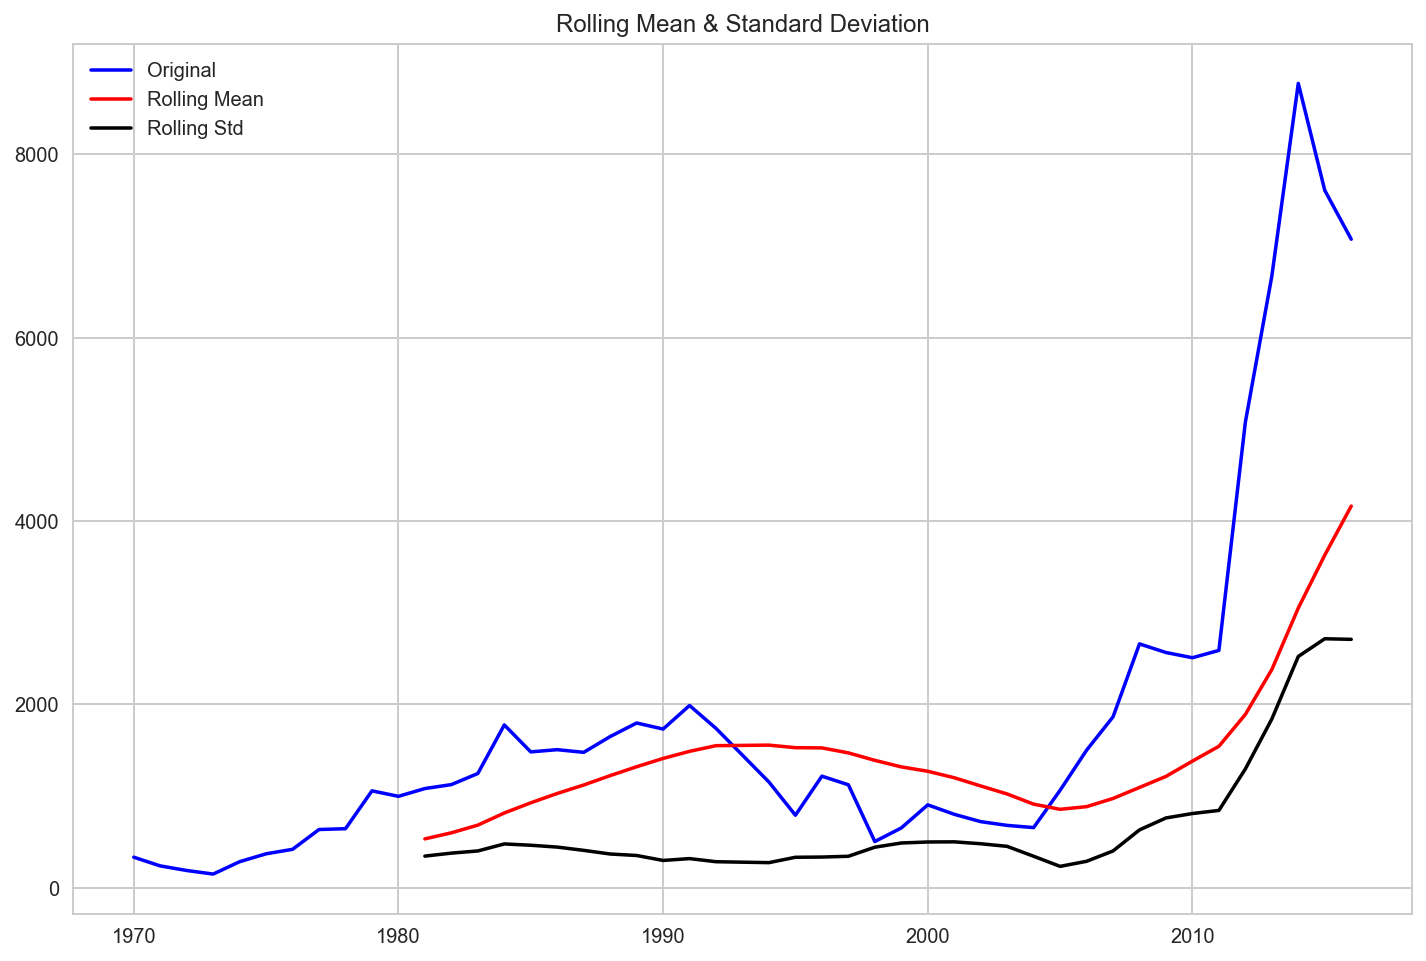

Results of Dickey-Fuller Test:
Test Statistic                 -0.595982
p-value                         0.871887
#Lags Used                      7.000000
Number of Observations Used    38.000000
Critical Value (5%)            -2.941262
Critical Value (1%)            -3.615509
Critical Value (10%)           -2.609200
dtype: float64


1970            NaN
1971            NaN
1972            NaN
1973            NaN
1974            NaN
1975            NaN
1976            NaN
1977            NaN
1978            NaN
1979            NaN
1980            NaN
1981     533.000000
1982     599.000000
1983     683.000000
1984     815.333333
1985     926.416667
1986    1028.250000
1987    1120.500000
1988    1223.000000
1989    1319.833333
1990    1410.416667
1991    1488.000000
1992    1549.750000
1994    1555.666667
1995    1527.833333
1996    1525.416667
1997    1471.000000
1998    1389.500000
1999    1318.333333
2000    1270.583333
2001    1199.916667
2002    1110.250000
2003    1022.666667
2004     911.666667
2005     855.416667
2006     884.333333
2007     973.750000
2008    1094.000000
2009    1214.250000
2010    1381.333333
2011    1542.750000
2012    1890.666667
2013    2379.916667
2014    3051.083333
2015    3628.416667
2016    4163.333333
Name: iyear, dtype: float64

In [78]:
# perform test
test_stationarity(features_b.iyear.value_counts().sort_index(), 12)

This is not a stationary process on a yearly basis. 

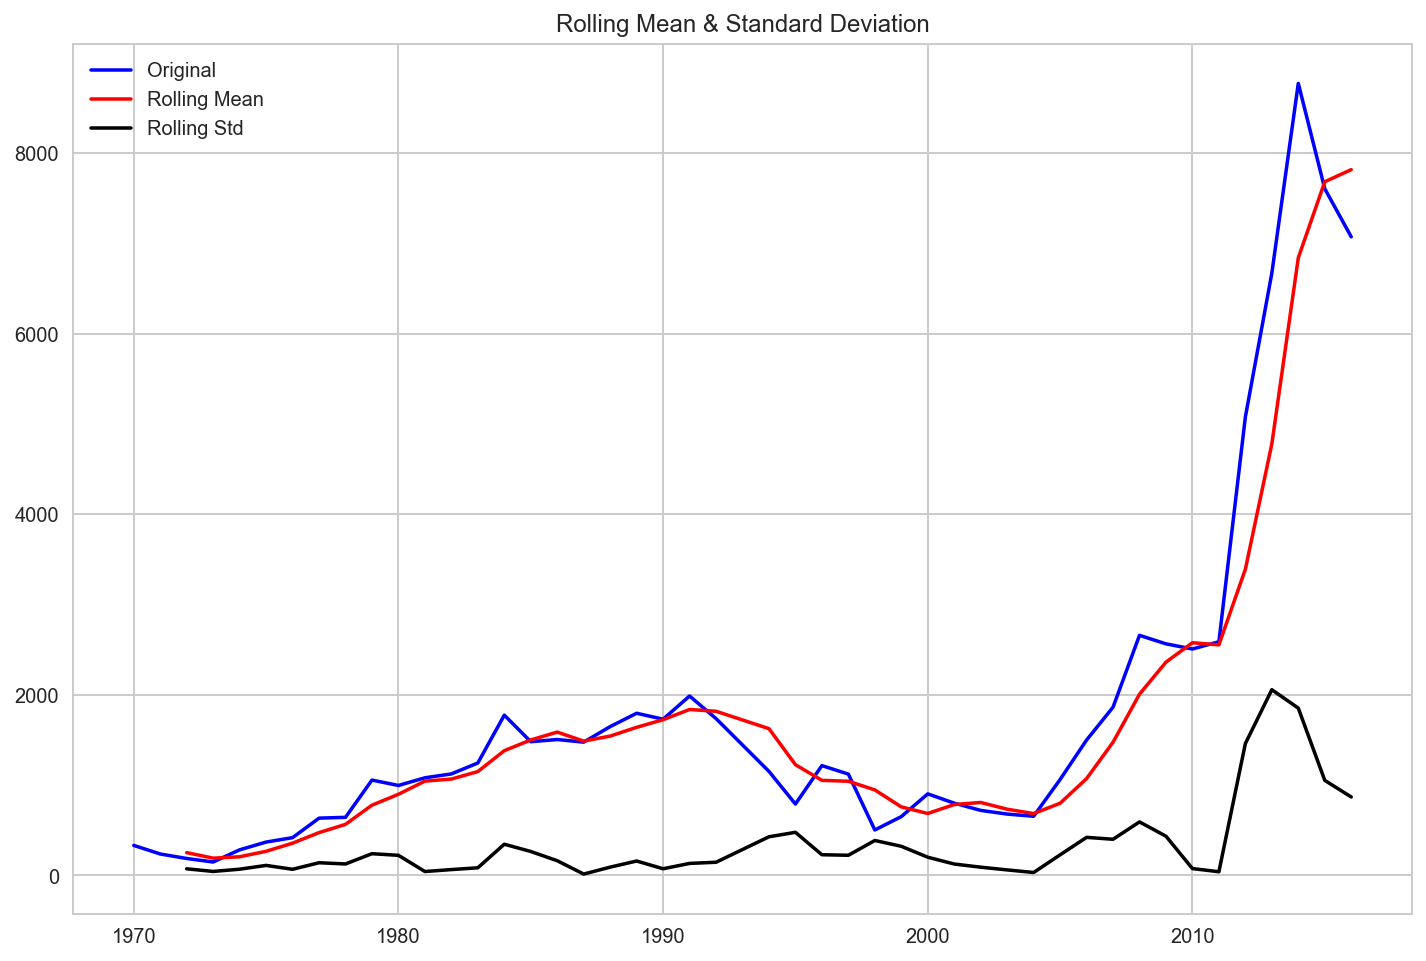

Results of Dickey-Fuller Test:
Test Statistic                 -0.595982
p-value                         0.871887
#Lags Used                      7.000000
Number of Observations Used    38.000000
Critical Value (5%)            -2.941262
Critical Value (1%)            -3.615509
Critical Value (10%)           -2.609200
dtype: float64


1970            NaN
1971            NaN
1972     253.000000
1973     191.666667
1974     207.000000
1975     267.666667
1976     357.666667
1977     474.666667
1978     566.000000
1979     778.666667
1980     899.333333
1981    1045.333333
1982    1068.000000
1983    1151.000000
1984    1382.333333
1985    1501.333333
1986    1588.000000
1987    1488.333333
1988    1544.000000
1989    1641.000000
1990    1725.666667
1991    1838.666667
1992    1819.000000
1994    1626.333333
1995    1227.333333
1996    1053.666667
1997    1043.666667
1998     948.000000
1999     759.666667
2000     686.666667
2001     785.666667
2002     808.666667
2003     734.000000
2004     685.666667
2005     799.666667
2006    1073.000000
2007    1475.666667
2008    2008.000000
2009    2363.333333
2010    2578.333333
2011    2554.666667
2012    3392.333333
2013    4780.000000
2014    6842.000000
2015    7685.000000
2016    7819.333333
Name: iyear, dtype: float64

In [79]:
test_stationarity(features_b.iyear.value_counts().sort_index(), 3)

This is not a stationary process on a monthly process. Because this quarterly trend more closely matches the actual data, I am going to use it to fill in the blanks for 1993. The average between 1992 and 1994 isn't a great estimator of 1993 bombings, but it is one way to do it. There are probably more elegant ways of handling this missing data. 

In [80]:
print ((1819.000000 + 1626.333333) / 2)

1722.6666665


Based on these assumptions, the number of bombings in 1993 was around 1720. 

## Synopsis of Results

Objective: 
	The objective of this project was to gain an understanding of terrorism using Bayesian inference. This analysis specifically looked at the Phillipines in Southeast Asia. My working knowledge on terrorism in Southeast Asia is limited. But this line of inquiry was sparked by the current chaotic situation in Marawi City, Philippines where Philippine Government security forces fight ISIS affiliated militants known as Abu Sayyaf and Maute.
The Global Terrorism Database contains over 170,000 cases of terrorism from around the globe. The National Consortium for the Study of Terrorism and Responses to Terrorism (START) maintains this database. START is headquartered at the University of Maryland. At the time of the submission of this project, 1970 to 2016 was accounted for. The database contains over one hundred and thirty variables including geographic location, type of attack, perpetrators, targets, outcomes, number of fatalities, and motivation of perpetrators. This was a very robust dataset but it does contain a fair amount of missing information. In particular, 1993 data was lost. One additional goal of this analysis was to impute the number of bombings that occurred in 1993. 
	
Exploratory Analysis: 
	The majority of exploratory data analysis was done through the use of visualizations. These visualizations can be found in the appendix of this document. To begin, the number of armed assault and bombing terror attacks dwarf the other methods of attacks (Graph 1). Hijacking (the method used by al-Qaeda terrorists in the September 11th 2001 attacks), assassinations, and hostage situations are far less numerous. Secondly, the number of people killed, grouped by region, showed the Middle East and South Asia as the two hot zones for terror activity from 1970-2016 (Graph 2). Media coverage of the Iraq and Afghan Wars has offered citizens a deeper look into the terrorist activities in the Middle East. But South Asia terrorist groups rarely make news in the United States. I decided to take a closer look into Southeast Asia (the Philippines specifically) because of my lack of awareness on the terrorism issues of that region. Bombings resulted in a high number of fatalities and Graph 3 shows a drastic increase in the number of bombs used by terrorist groups since 2010. The Philippines have experienced this global trend as well. This noticeable spike in bombings in 2010 sparked the Bayesian analysis. 

Bayesian Analysis: 
	The goal of the Bayesian analysis was to determine if there was a statistical between the number of terrorist bombings in the Philippines from pre-2010 and post-2010. From a global view, bombings increased drastically since 2010. The prior probability of terror attacks in the Philippines was a simple average the number of bombings between 1970 and 2009. This turned out to be around 29 bombings per year. The average of bombings per year between 1970 and 2009 was a logical prior assumption for Bayesian statistics because this would have been the only information available at the onset of 2009. If we were making the analysis in 2010, we would want to see whether or not one year of increased terror attacks was statistically different than the previous forty years. 
	The full breakdown of the Markov Chain Monte Carlo method can be found in the Jupyter Notebook associated with this project. The MCMC method revealed there was a statistical difference between pre-2010 bombings in the Philippines and post-2010 bombings. The credible intervals between the two groups did not overlap and the difference in means was statistically different than zero. Overall, this analysis isn’t very surprising because of the global trend in increased terrorism starting in the early 2000’s. An industry expert with prior knowledge of terrorism could more readily utilize MCMC methods in order to derive key insights into the world of terrorism analysis. 

Missing Values: 
	The information from 1993 was lost. In order to develop an estimate for the number of terror attacks (attacktype1 in the Codebook), time series analysis was utilized. I used the Dicky-Fuller test to determine whether or not a unit root was present in the data. This test for stationarity concluded the data was non-stationary. Graph 4 shows a rolling mean of 12 months and Graph 5 shows a quarterly rolling mean. Both of these graphs illustrate non-stationary processes.   
	I made the decision to simply take the average number of bombings between 1992 and 1994 in order to estimate the number of bombings for 1993. The quarterly rolling mean for 1992 was 1,819 total bombings and 1,626 bombings in 1994. I estimated around 1,720 bombings for the year of 1993. There may be more elegant ways of estimating the number of total bombings in 1993, but this option seemed most effective out of the box. 

Conclusion: 
	The world has seen an increase in terrorist bombings since 2010. It fills our news and plagues many of the worlds’ citizenry. The terrorist groups Abu Sayyaf (who pledged allegiance to ISIS in 2014) and Mauta group currently fight Philippine Government security forces in Marawi City, Philippines. This analysis sought to shed a little light into the crisis brewing in the Philippines. It seems that the number of terror bombings has increased across the globe since 2010 and increased markedly in the Philippines. Overall, it is with the help of START that we can learn more about terrorist activities and develop proper strategies in order to counteract their threat. 
